In [1]:
import os
import re
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

pd.set_option('display.max_columns', None)

full_path = []
for dirname, _, filenames in os.walk('C:/Users/E083660/OneDrive - RSM/Kaggle'):
    for filename in filenames:
        full_path.append(os.path.join(dirname,filename))
        print(os.path.join(dirname, filename))

C:/Users/E083660/OneDrive - RSM/Kaggle\Cities.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\Conferences.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MConferenceTourneyGames.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MGameCities.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MMasseyOrdinals.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneyCompactResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneyDetailedResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneySeedRoundSlots.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneySeeds.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MNCAATourneySlots.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MRegularSeasonCompactResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MRegularSeasonDetailedResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MSeasons.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MSecondaryTourneyCompactResults.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MSecondaryTourneyTeams.csv
C:/Users/E083660/OneDrive - RSM/Kaggle\MTea

In [2]:
dirname = "C:/Users/E083660/OneDrive - RSM/Kaggle"

df_MRegSeason = pd.read_csv(dirname+'/MRegularSeasonDetailedResults.csv')
df = pd.read_csv(dirname+'/SampleSubmission2023.csv')

In [3]:
df_MRegSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106829,2023,113,1403,74,1328,63,A,0,29,47,7,12,9,14,5,31,11,16,4,1,17,21,59,9,33,12,15,6,13,13,8,10,1,12
106830,2023,113,1405,84,1103,63,H,0,32,61,10,20,10,13,7,25,16,7,7,7,17,26,59,4,21,7,14,9,23,10,10,3,0,11
106831,2023,113,1429,65,1461,55,A,0,21,51,7,27,16,22,7,27,11,12,7,3,15,17,54,6,23,15,20,7,25,6,11,6,3,19
106832,2023,113,1433,88,1386,63,A,0,31,59,11,19,15,18,8,23,14,9,6,5,16,21,56,8,28,13,18,5,20,10,11,3,3,15


# Exploratory Data Analysis

### 3 Pointers

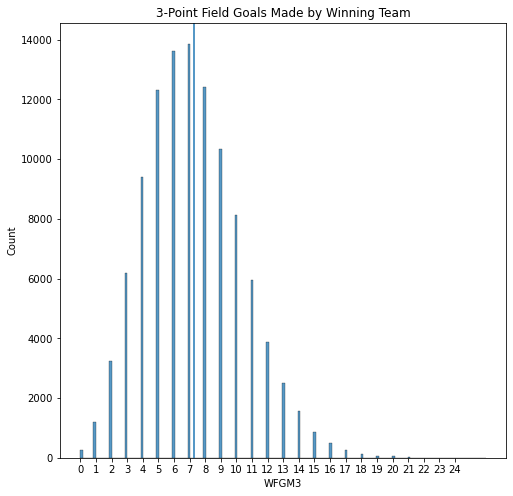

In [4]:
plt.figure(figsize=(8,8))
plt.xticks(ticks =np.arange(0,25,1), labels=np.arange(0,25,1))
mean = np.mean(df_MRegSeason['WFGM3'])
sb.histplot(df_MRegSeason['WFGM3'])
plt.axvline(mean)
plt.xticks(ticks =np.arange(0,25,1), labels=np.arange(0,25,1))
plt.title("3-Point Field Goals Made by Winning Team");

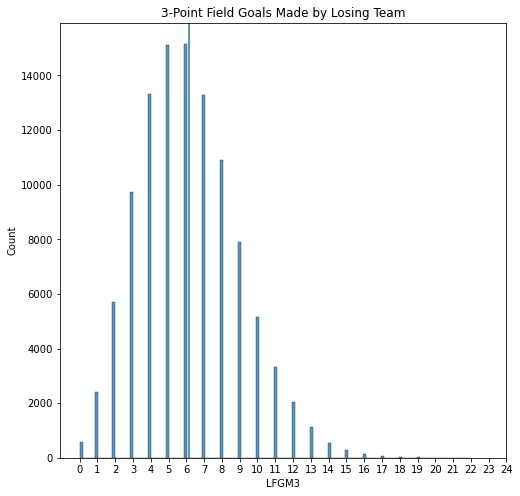

In [5]:
plt.figure(figsize=(8,8))
mean = np.mean(df_MRegSeason['LFGM3'])
sb.histplot(df_MRegSeason['LFGM3'])
plt.axvline(mean)
plt.xticks(ticks =np.arange(0,25,1), labels=np.arange(0,25,1))
plt.title("3-Point Field Goals Made by Losing Team");

#### Calculate % of 3pt made in 2023 season

In [6]:
MSeason = df_MRegSeason

In [7]:
W3 = MSeason.groupby(['Season','WTeamID'])[['WFGM3','WFGA3']].sum().reset_index()[['Season','WTeamID','WFGM3','WFGA3']]
W3['WFGM3%'] = W3['WFGM3'] / W3['WFGA3']

In [8]:
L3 = MSeason.groupby(['Season','LTeamID'])[['LFGM3','LFGA3']].sum().reset_index()[['Season','LTeamID','LFGM3','LFGA3']]
L3['LFGM3%'] = L3['LFGM3'] / L3['LFGA3']

<Figure size 432x288 with 0 Axes>

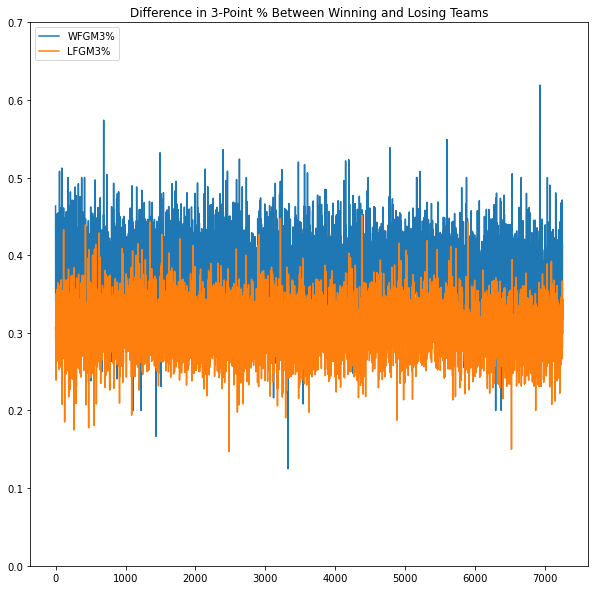

In [9]:
fig = plt.figure()
plt.figure(figsize=(10,10))
for frame in [W3,L3]:
    plt.plot(frame.index, frame.iloc[:,-1], label=frame.columns[-1])

plt.ylim(0,.7)
plt.title("Difference in 3-Point % Between Winning and Losing Teams")
plt.legend(loc='upper left')
plt.show()

(0.10029761904761905, 0.64375)

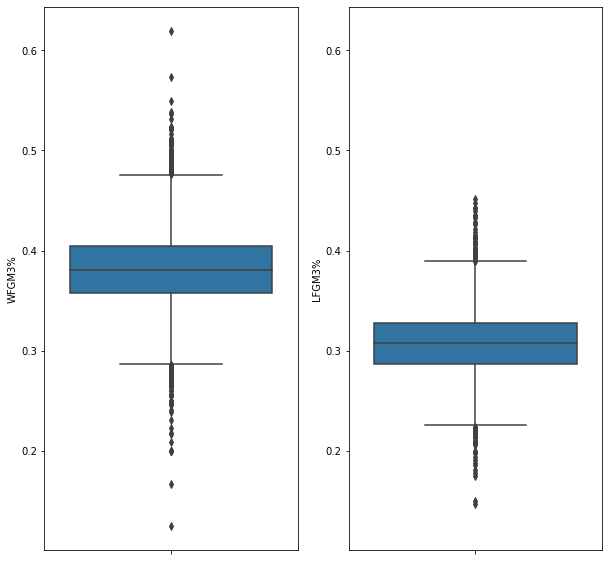

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sb.boxplot(data=W3, y='WFGM3%')
ymin, ymax = plt.gca().get_ylim()
plt.subplot(1,2,2)
sb.boxplot(data=L3, y='LFGM3%')
plt.ylim([ymin, ymax])

## Feature Engineering

#### Overall Team 3-Point Shooting %'s

In [11]:
all3 = W3
all3['WFGM3'] = all3['WFGM3'] + L3['LFGM3']
all3['WFGA3'] = all3['WFGA3'] + L3['LFGA3']
all3.rename(columns={'WTeamID':'TeamID','WFGM3':'FGM3', 'WFGA3':'FGA3'}, inplace =True)
all3['FG3%'] = all3['FGM3']/all3['FGA3']

In [12]:
all3.sort_values(by='FG3%',ascending=False)

,Season,TeamID,FGM3,FGA3,WFGM3%,FG3%
3213,2012,1294,86.0,181.0,0.495238,0.475138
5311,2018,1295,179.0,396.0,0.468165,0.452020
6527,2021,1471,93.0,207.0,0.504854,0.449275
3215,2012,1296,171.0,385.0,0.480000,0.444156
1504,2007,1309,160.0,361.0,0.479638,0.443213
...,...,...,...,...,...,...
2604,2010,1380,67.0,262.0,0.350000,0.255725
630,2004,1440,111.0,435.0,0.272727,0.255172
1471,2007,1271,72.0,289.0,0.348837,0.249135
3309,2012,1394,72.0,292.0,0.222222,0.246575


#### Overall Team Shooting %'s

In [13]:
WFG = MSeason.groupby(['Season','WTeamID'])[['WFGM','WFGA']].sum().reset_index()[['Season','WTeamID','WFGM','WFGA']]
LFG = MSeason.groupby(['Season', 'LTeamID'])[['LFGM','LFGA']].sum().reset_index()[['Season','LTeamID','LFGM','LFGA']]
    
allFG = WFG
allFG['WFGM'] = allFG['WFGM'] + LFG['LFGM']
allFG['WFGA'] = allFG['WFGA'] + LFG['LFGA']
allFG.rename(columns={'WTeamID':'TeamID','WFGM':'FGM', 'WFGA':'FGA'}, inplace =True)
allFG['FG%'] = allFG['FGM']/allFG['FGA']


In [14]:
allFG.sort_values(by='FG%',ascending=False)

,Season,TeamID,FGM,FGA,FG%
949,2005,1429,781.0,1466.0,0.532742
3214,2012,1295,464.0,896.0,0.517857
5805,2019,1441,251.0,487.0,0.515400
427,2004,1211,842.0,1635.0,0.514985
6527,2021,1471,311.0,606.0,0.513201
...,...,...,...,...,...
504,2004,1299,576.0,1597.0,0.360676
342,2004,1119,403.0,1132.0,0.356007
12,2003,1115,539.0,1520.0,0.354605
2494,2010,1265,233.0,661.0,0.352496


#### Win Ratio

In [15]:
num_win = MSeason.groupby(['Season','WTeamID']).count().reset_index()[['Season','WTeamID','DayNum']].rename(columns={'WTeamID':'TeamID','DayNum':'NumWins'})
num_loss = MSeason.groupby(['Season','LTeamID']).count().reset_index()[['Season','LTeamID','DayNum']].rename(columns={'LTeamID':'TeamID','DayNum':'NumLosses'})

In [16]:
win_ratio = num_win
win_ratio['NumLosses'] = num_loss['NumLosses']
win_ratio['WinRatio'] = win_ratio['NumWins'] /(win_ratio['NumWins'] + win_ratio['NumLosses'])
win_ratio.sort_values(by='WinRatio',ascending=False)

,Season,TeamID,NumWins,NumLosses,WinRatio
767,2005,1228,32,1,0.969697
583,2004,1390,29,1,0.966667
579,2004,1386,27,1,0.964286
6517,2021,1460,18,1,0.947368
3214,2012,1295,16,1,0.941176
...,...,...,...,...,...
178,2003,1299,1,25,0.038462
339,2004,1115,1,26,0.037037
469,2004,1259,1,27,0.035714
3321,2012,1406,1,27,0.035714


In [34]:
win_ratio[['Season','TeamID']] = win_ratio[['Season','TeamID']].astype(str) 

#### Gap Win / Gap Loss

In [17]:
ScoreDf = MSeason[['Season','DayNum','WTeamID','WScore','LTeamID','LScore']]
ScoreDf['ScoreGap'] = ScoreDf['WScore'] - ScoreDf['LScore']

C:\Users\E083660\AppData\Local\Temp\ipykernel_29560\15143874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ScoreDf['ScoreGap'] = ScoreDf['WScore'] - ScoreDf['LScore']


In [18]:
gap_win = ScoreDf.groupby(['Season', 'WTeamID']).mean().reset_index()
gap_win = gap_win[['Season', 'WTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapWins", "WTeamID": "TeamID"})
gap_loss = ScoreDf.groupby(['Season', 'LTeamID']).mean().reset_index()
gap_loss = gap_loss[['Season', 'LTeamID', 'ScoreGap']].rename(columns={"ScoreGap": "GapLosses", "LTeamID": "TeamID"})

In [19]:
gap_win[['Season','TeamID']] = gap_win[['Season','TeamID']].astype(str)

In [27]:
gap_loss[['Season','TeamID']] = gap_loss[['Season','TeamID']].astype(str)

#### Merge to Master DataFrame

In [20]:
df[['Season','TeamIdA','TeamIdB']]= df['ID'].str.split('_',expand=True)

In [21]:
df_test = df.copy()

In [22]:
### adding the average difference between scores that team has when they win

df_test = pd.merge(df_test, gap_win, how='left',
         left_on=['Season','TeamIdA'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'GapWins':'GapWinsA'})


In [25]:
### now the same for team B

df_test = pd.merge(df_test, gap_win, how='left',
                  left_on=['Season','TeamIdB'],
                  right_on=['Season','TeamID']).drop('TeamID', axis=1).rename(columns={'GapWins':'GapWinsB'})

In [30]:
### adding the average difference between scores that team has when they lose

df_test = pd.merge(df_test,gap_loss, how='left',
        left_on=['Season','TeamIdA'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'GapLosses':'GapLossA'})

In [31]:
### Same for team B

df_test = pd.merge(df_test,gap_loss, how='left',
        left_on=['Season','TeamIdB'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'GapLosses':'GapLossB'})

In [40]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB,GapWinsA,GapWinsB,GapLossA,GapLossB,NumWinsA,NumLossesA,WinRatioA,NumWinsB,NumLossesB,WinRatioB
0,2023_1101_1102,0.5,2023,1101,1102,11.333333,12.642857,12.692308,11.333333,9.0,13.0,0.409091,14.0,18.0,0.437500
1,2023_1101_1103,0.5,2023,1101,1103,11.333333,15.411765,12.692308,12.777778,9.0,13.0,0.409091,17.0,17.0,0.500000
2,2023_1101_1104,0.5,2023,1101,1104,11.333333,20.260870,12.692308,14.500000,9.0,13.0,0.409091,23.0,16.0,0.589744
3,2023_1101_1105,0.5,2023,1101,1105,11.333333,10.111111,12.692308,11.250000,9.0,13.0,0.409091,9.0,20.0,0.310345
4,2023_1101_1106,0.5,2023,1101,1106,11.333333,7.285714,12.692308,15.650000,9.0,13.0,0.409091,7.0,13.0,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130678,2023_3474_3476,0.5,2023,3474,3476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130679,2023_3474_3477,0.5,2023,3474,3477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130680,2023_3475_3476,0.5,2023,3475,3476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130681,2023_3475_3477,0.5,2023,3475,3477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
### Merge numwins numlosses and win ratio

df_test = pd.merge(df_test,win_ratio, how='left',
        left_on=['Season','TeamIdA'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'NumWins':'NumWinsA','NumLosses':'NumLossesA','WinRatio':'WinRatioA'})

In [39]:
### Merge same as block before but for B

df_test = pd.merge(df_test,win_ratio, how='left',
        left_on=['Season','TeamIdB'],
        right_on=['Season','TeamID']).drop('TeamID',axis=1).rename(columns={'NumWins':'NumWinsB','NumLosses':'NumLossesB','WinRatio':'WinRatioB'})

In [ ]:
### Compute the GapAvg

df_test['GapAvgA'] = (
                (df_test['NumWinsA'] * df_test) * )